<h2>Preuzimanje ključnih paketa</h2>

<h3>Za početak je potrebno klonirati yolov5 repozitorij</h3>

In [1]:
!git clone https://github.com/ultralytics/yolov5 

fatal: destination path 'yolov5' already exists and is not an empty directory.


<h3>Zatim je potrebno instalirati sve potrebne pakete navedene u reqirements.txt</h3>


In [2]:
!cd yolov5 & pip install -r requirements.txt

<h2>Testiranje predefiniranog modela</h2>

<h3>Detekcija objekata na slici</h3> 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
import os

In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5l')

Using cache found in C:\Users\Robert/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-18 Python-3.7.11 torch-1.10.2 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5l_v6 summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 64, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      

In [6]:
img = 'https://images.pexels.com/photos/4925870/pexels-photo-4925870.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940'

Saved 1 image to runs\detect\exp21


image 1/1: 1253x1880 1 person, 2 cups, 1 chair, 1 dining table, 1 laptop
Speed: 306.0ms pre-process, 31.0ms inference, 5.0ms NMS per image at shape (1, 3, 448, 640)


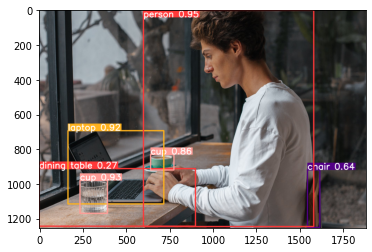

In [7]:
results = model(img)
results.print()
results.save()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

<h3>Detekcija objekata korištenjem webcam-a</h3>

In [8]:
webCam = cv2.VideoCapture(0)
while webCam.isOpened():
    _, frame = webCam.read()
    results = model(frame)
    cv2.imshow('Object detection - yolov5',np.squeeze(results.render()))
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
webCam.release()
cv2.destroyAllWindows()

<h2>Treniranje model vlastitim datasetom</h2>

In [12]:
!cd yolov5 && python train.py --img 320 --batch 4 --epochs 50 --data dataset.yaml --weights yolov5l.pt --workers 0

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5l.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-2-1 torch 1.10.2 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, 

      6/49     1.41G   0.06532   0.01611  0.008719        10       320:  66%|######5   | 42/64 [00:08<00:04,  4.79it/s]
      6/49     1.41G   0.06532   0.01611  0.008719        10       320:  67%|######7   | 43/64 [00:08<00:04,  4.94it/s]
      6/49     1.41G   0.06528    0.0163   0.00871        15       320:  67%|######7   | 43/64 [00:09<00:04,  4.94it/s]
      6/49     1.41G   0.06528    0.0163   0.00871        15       320:  69%|######8   | 44/64 [00:09<00:04,  4.60it/s]
      6/49     1.41G   0.06506   0.01642  0.008709        12       320:  69%|######8   | 44/64 [00:09<00:04,  4.60it/s]
      6/49     1.41G   0.06506   0.01642  0.008709        12       320:  70%|#######   | 45/64 [00:09<00:03,  4.87it/s]
      6/49     1.41G   0.06487   0.01653  0.008844        12       320:  70%|#######   | 45/64 [00:09<00:03,  4.87it/s]
      6/49     1.41G   0.06487   0.01653  0.008844        12       320:  72%|#######1  | 46/64 [00:09<00:03,  4.59it/s]
      6/49     1.41G   0.06471   0.01644

     27/49     1.41G   0.03031   0.00992  0.003402         6       320:  66%|######5   | 42/64 [00:08<00:04,  4.68it/s]
     27/49     1.41G   0.03044   0.01006  0.003386        17       320:  66%|######5   | 42/64 [00:09<00:04,  4.68it/s]
     27/49     1.41G   0.03044   0.01006  0.003386        17       320:  67%|######7   | 43/64 [00:09<00:04,  4.96it/s]
     27/49     1.41G   0.03024  0.009948  0.003348         5       320:  67%|######7   | 43/64 [00:09<00:04,  4.96it/s]
     27/49     1.41G   0.03024  0.009948  0.003348         5       320:  69%|######8   | 44/64 [00:09<00:03,  5.20it/s]
     27/49     1.41G    0.0302  0.009982  0.003323        14       320:  69%|######8   | 44/64 [00:09<00:03,  5.20it/s]
     27/49     1.41G    0.0302  0.009982  0.003323        14       320:  70%|#######   | 45/64 [00:09<00:03,  4.97it/s]
     27/49     1.41G   0.03006  0.009889  0.003297         6       320:  70%|#######   | 45/64 [00:09<00:03,  4.97it/s]
     27/49     1.41G   0.03006  0.009889

     32/49     1.41G   0.02558  0.007536   0.00335         9       320:  47%|####6     | 30/64 [00:06<00:06,  4.90it/s]
     32/49     1.41G   0.02558  0.007536   0.00335         9       320:  48%|####8     | 31/64 [00:06<00:06,  4.91it/s]
     32/49     1.41G   0.02541  0.007501  0.003285         7       320:  48%|####8     | 31/64 [00:06<00:06,  4.91it/s]
     32/49     1.41G   0.02541  0.007501  0.003285         7       320:  50%|#####     | 32/64 [00:06<00:06,  4.78it/s]
     32/49     1.41G   0.02562  0.007547  0.003254         8       320:  50%|#####     | 32/64 [00:06<00:06,  4.78it/s]
     32/49     1.41G   0.02562  0.007547  0.003254         8       320:  52%|#####1    | 33/64 [00:06<00:06,  5.05it/s]
     32/49     1.41G   0.02565  0.007704    0.0032        16       320:  52%|#####1    | 33/64 [00:06<00:06,  5.05it/s]
     32/49     1.41G   0.02565  0.007704    0.0032        16       320:  53%|#####3    | 34/64 [00:06<00:05,  5.22it/s]
     32/49     1.41G   0.02551  0.007669

<h2>Testiranje modela</h2>

In [13]:
model = torch.hub.load('ultralytics/yolov5','custom', path = 'yolov5/runs/train/exp2/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Robert/.cache\torch\hub\master.zip
YOLOv5  2022-6-18 Python-3.7.11 torch-1.10.2 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 367 layers, 46119048 parameters, 0 gradients, 107.8 GFLOPs
Adding AutoShape... 


In [14]:
results = model('https://cdn.pixabay.com/photo/2016/03/23/12/53/clock-1274699_1280.jpg')
results.print()

image 1/1: 720x1280 1 Clock
Speed: 314.3ms pre-process, 9.0ms inference, 15.6ms NMS per image at shape (1, 3, 384, 640)


Saved 1 image to runs\detect\exp23


image 1/1: 720x1280 1 Clock
Speed: 314.3ms pre-process, 9.0ms inference, 15.6ms NMS per image at shape (1, 3, 384, 640)


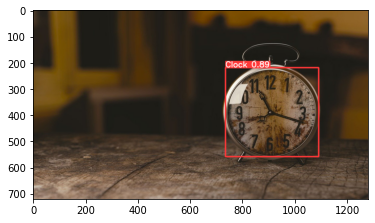

In [15]:
results.print()
results.save()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

<h2>Testiranje modela na webcam-u</h2>

In [16]:
webCam = cv2.VideoCapture(0)
while webCam.isOpened():
    _, frame = webCam.read()
    results = model(frame)
    cv2.imshow('Object detection, custom dataset - yolov5',np.squeeze(results.render()))
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
webCam.release()
cv2.destroyAllWindows()